
# THE SPARKS FOUNDATION
## Task-2 Prediction using Unsupervised ML
## Predicting the optimum number of clusters and representing it visually
## Author: Goutham Pasumarthy
## Algorithm used: K-Means Clustering

**Importing the libraries**

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
#URL which contains the file
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/"
# Fetching the file from google drive
url2 ='https://drive.google.com/uc?id=' + url.split('/')[-2]
#Loading the data
iris_df = pd.read_csv(url2)
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
#Dropping the id
iris_df.drop("Id",axis = 1,inplace =True)
#iris_df.columns

In [72]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **Finding the value of k / Determining the number of clusters**

In [73]:
#Converting the values in the dataset to an array removing the class label
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
#wccs is the sum of squares
wcss = []

# Now we are incrementing the value of k and
#calculating the sum of squares of the data for each iteration and adding it to wcss variable
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    #kmeans.inertia returns the wcss value of the clustered data
    wcss.append(kmeans.inertia_)


### **Plotting the data obtained above**

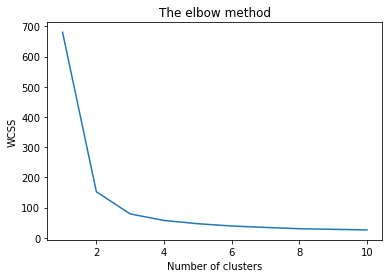

In [74]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## Elbow Method
#### The elbow method is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

#### We can observe that the graph is similar to the shape of an elbow. The optimum number of clusters is where the graph bends.
#### This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#### So from this graph , lets choose of the k to be 3

In [75]:
#K is 3 and we are applying the KMeans model to the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Observe the values clustered by the Kmeans
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visual Representation Of Data

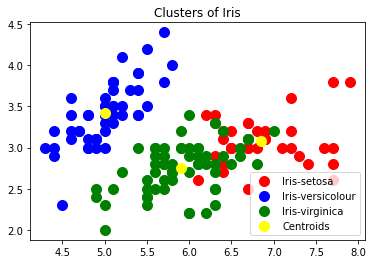

In [78]:
#plotting the ouput using Matplotlib
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
#plt.grid(True)
plt.title('Clusters of Iris')
out = plt.legend()